# **Table of Contents**

* [Introduction](#introduction)
* [Importing Necessary Libraries](#importing-necessary-libraries)
* [Data Loading](#data-loading)

* [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
  - [Target Distribution](#target-distribution)
  - [Categorical Features](#categorical-features)
  - [Numerical Features](#numerical-features)
  - [Correlation Heatmap](#correlation-heatmap)
  - [Summary of Findings](#summary-of-findings)

* [Data Preprocessing](#data-preprocessing)
  - [Handling Missing Values](#handling-missing-values)
  - [Handling Redundant and Ambiguous Categorical Features](#handling-redundant-and-ambiguous-categorical-features)
  - [Encoding Categorical Variables](#encoding-categorical-variables)

* [Feature Engineering](#feature-engineering)
  - [Creating New Features](#creating-new-features)
  - [Transforming the Target Variable](#transforming-the-target-variable)

* [Dataset Splitting](#dataset-splitting)
* [Normalization / Standardization](#normalization-/-standardization)

* [Model Development and Evaluation](#model-development-and-evaluation)
  - [Naive Bayes](#naive-bayes)
  - [Decision Tree](#decision-tree)
  - [Random Forest](#random-forest)
  - [XGBoost](#xgboost)

* [Custom Decision Tree Implementation](#custom-decision-tree-implementation)
  - [Building from Scratch](#building-from-scratch)
  - [Comparison with Scikit-learn](#comparison-with-scikit-learn)

* [Predict Your AI Grade](#predict-your-aI-grade)


## **Introduction**

In this task, we aim to develop a **classification model** that predicts students' **final academic grades (`finalGrade`)** using their demographic, social, and academic characteristics.

This project is part of the **AI course at the University of Tehran** and involves analyzing a dataset of students with rich information about their background and behavior. The goal is to identify key factors affecting academic success and build models that can accurately classify students based on their expected performance.

The dataset includes the following types of features:

| Feature Type          | Example Columns                                                |
| --------------------- | -------------------------------------------------------------- |
| **Demographics**      | `university`, `sex`, `age`, `address`                          |
| **Parental Info**     | `motherEducation`, `fatherEducation`, `motherJob`, `fatherJob`, `reason`|
| **Academic Behavior** | `studyTime`, `travelTime`, `failures`, `universitySupport`, `higher`, `paid`|
| **Social Factors**    | `romantic`, `goOut`, `freeTime`, `Dalc`, `Walc`, `internet`, `absences`|
| **Past Performance**  | `EPSGrade`, `DSGrade`                                          |

In the following sections, we will explore the data, clean and preprocess it, engineer meaningful features, and evaluate multiple machine learning models — including a custom Decision Tree classifier implemented from scratch — to predict student performance.

## **Importing Necessary Libraries**

In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import numpy as np

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## **Data Loading**

In [428]:
path_to_data = 'Grades.csv'

students_data = pd.read_csv(path_to_data)

print("Students Data Preview:")
display(students_data.head())

students_data.info()

Students Data Preview:


,university,sex,age,address,motherEducation,fatherEducation,motherJob,fatherJob,reason,travelTime,...,internet,romantic,freeTime,goOut,Dalc,Walc,absences,EPSGrade,DSGrade,finalGrade
0,PR,F,18,U,4,4,at_home,teacher,course,2,...,no,no,3,4,1,1,6,5,6,6
1,PR,F,17,U,1,1,at_home,other,course,1,...,yes,no,3,3,1,1,4,5,5,6
2,PR,F,15,U,1,1,at_home,other,other,1,...,yes,no,3,2,2,3,10,7,8,10
3,PR,F,15,U,4,2,health,services,home,1,...,yes,yes,2,2,1,1,2,15,14,15
4,PR,F,16,U,3,3,other,other,home,1,...,no,no,3,2,1,2,4,6,10,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   university         397 non-null    object
 1   sex                397 non-null    object
 2   age                397 non-null    int64 
 3   address            397 non-null    object
 4   motherEducation    397 non-null    int64 
 5   fatherEducation    397 non-null    int64 
 6   motherJob          397 non-null    object
 7   fatherJob          397 non-null    object
 8   reason             397 non-null    object
 9   travelTime         397 non-null    int64 
 10  studyTime          397 non-null    int64 
 11  failures           397 non-null    int64 
 12  universitySupport  397 non-null    object
 13  paid               397 non-null    object
 14  higher             397 non-null    object
 15  internet           397 non-null    object
 16  romantic           397 non-null    object
 1

## **Exploratory Data Analysis**

### Target Distribution

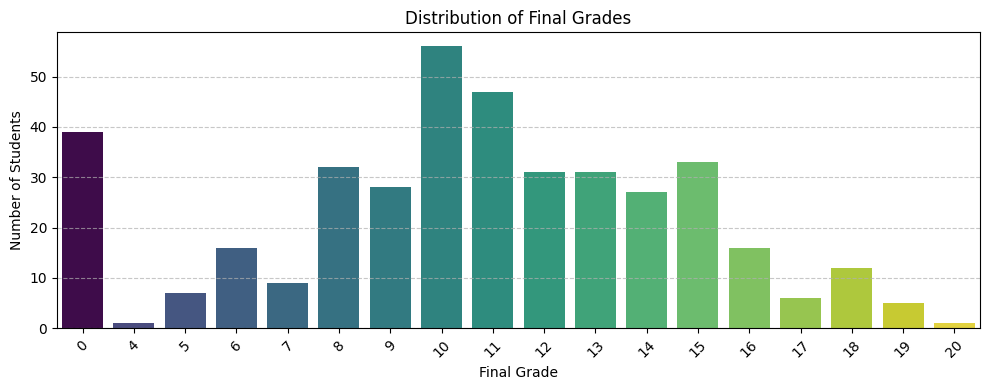

In [429]:
plt.figure(figsize=(10, 4))
sns.countplot(x='finalGrade', hue='finalGrade', data=students_data, palette='viridis', legend=False)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Categorical Features

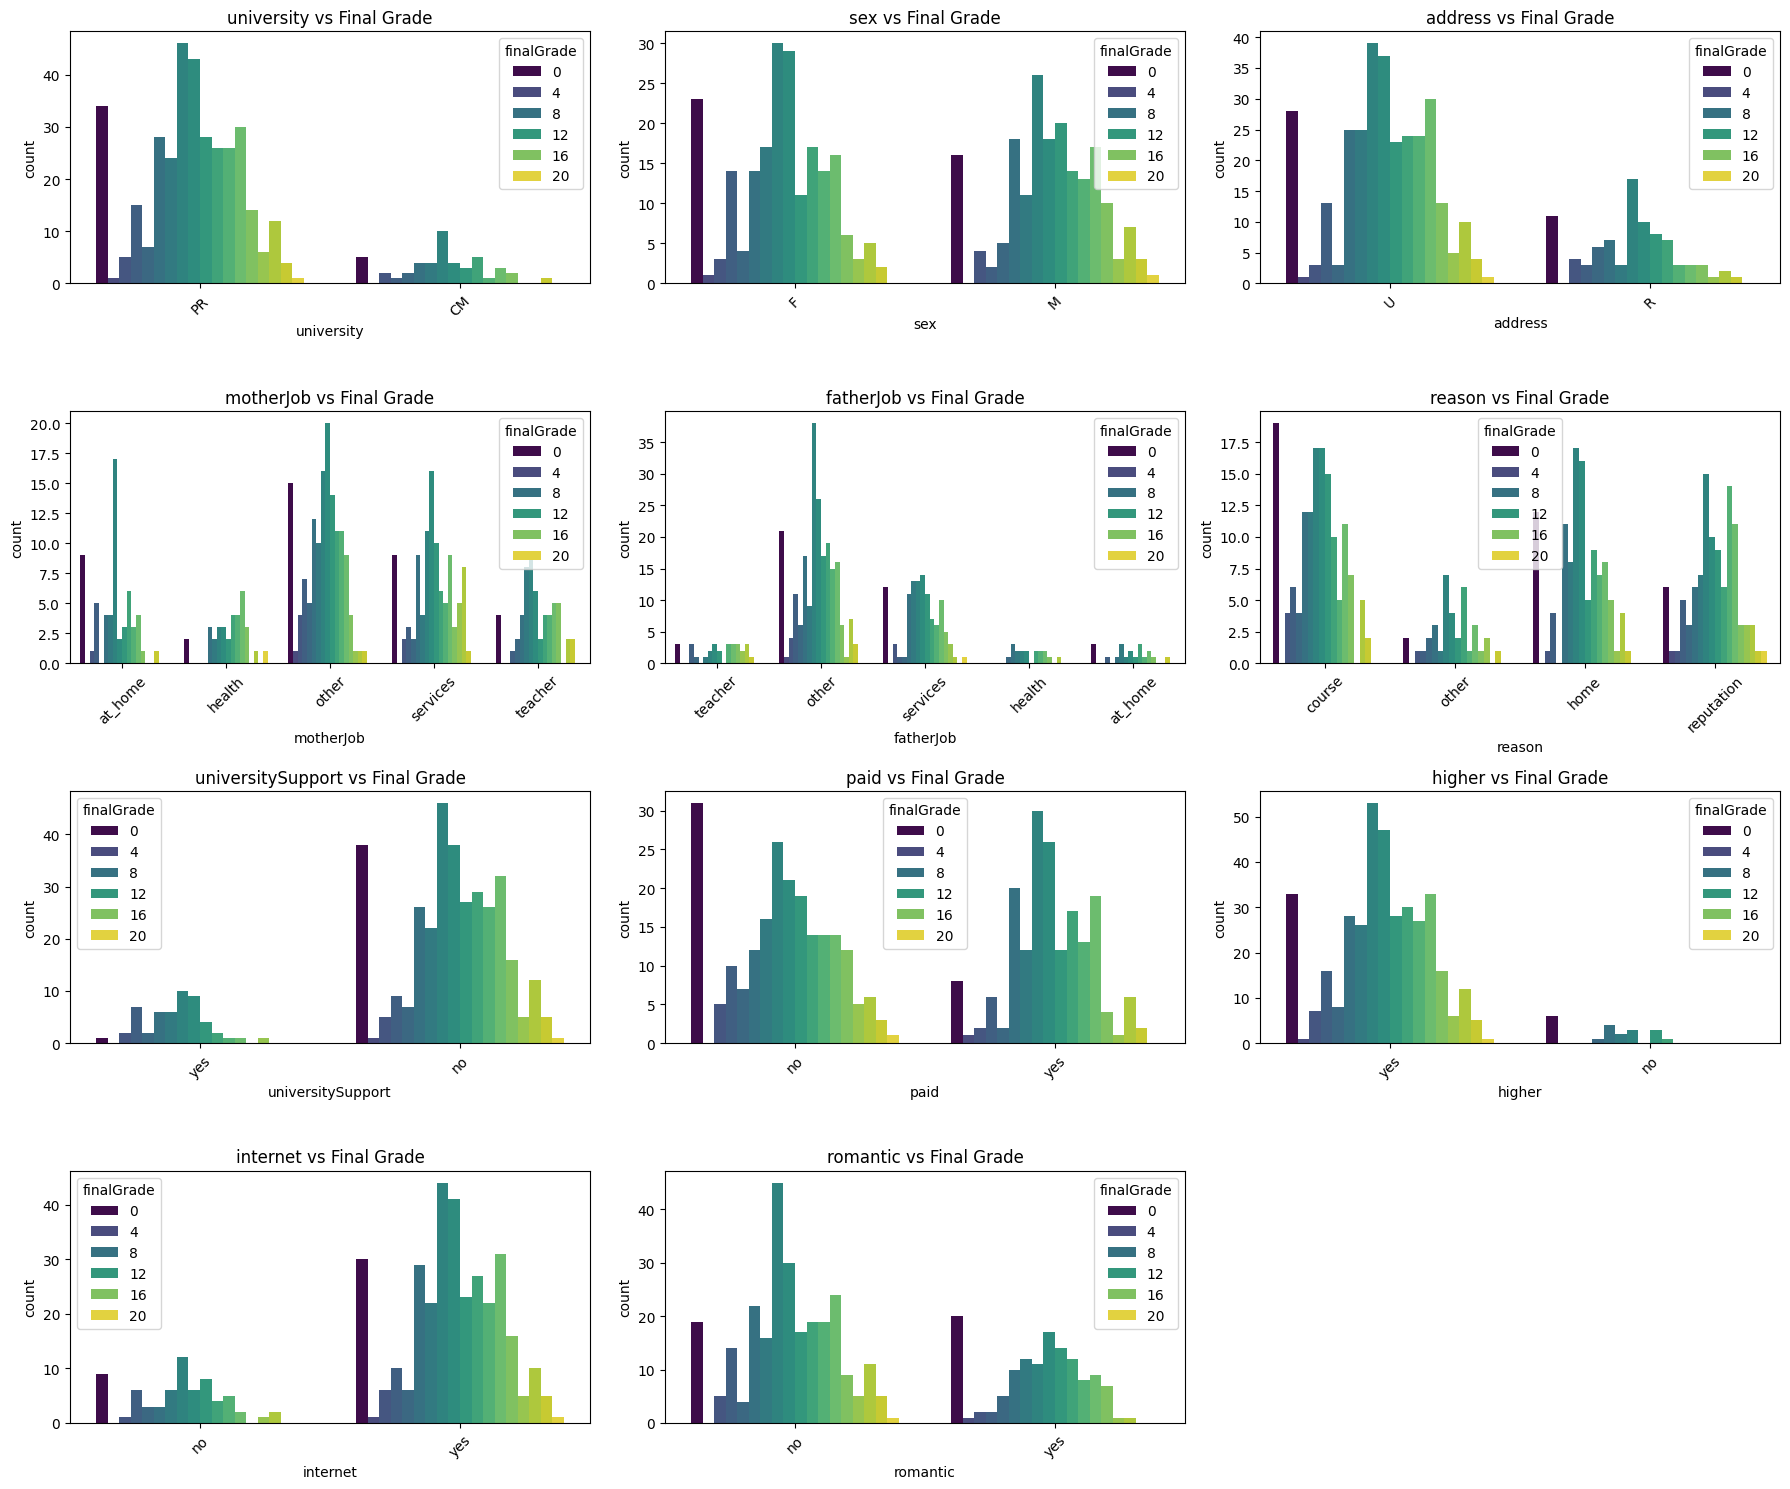

In [430]:
categorical_features = ['university', 'sex', 'address', 'motherJob', 'fatherJob', 
                        'reason', 'universitySupport', 'paid', 'higher', 'internet', 'romantic']

plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=col, hue='finalGrade', data=students_data, palette='viridis')
    plt.title(f'{col} vs Final Grade')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### Numerical Features

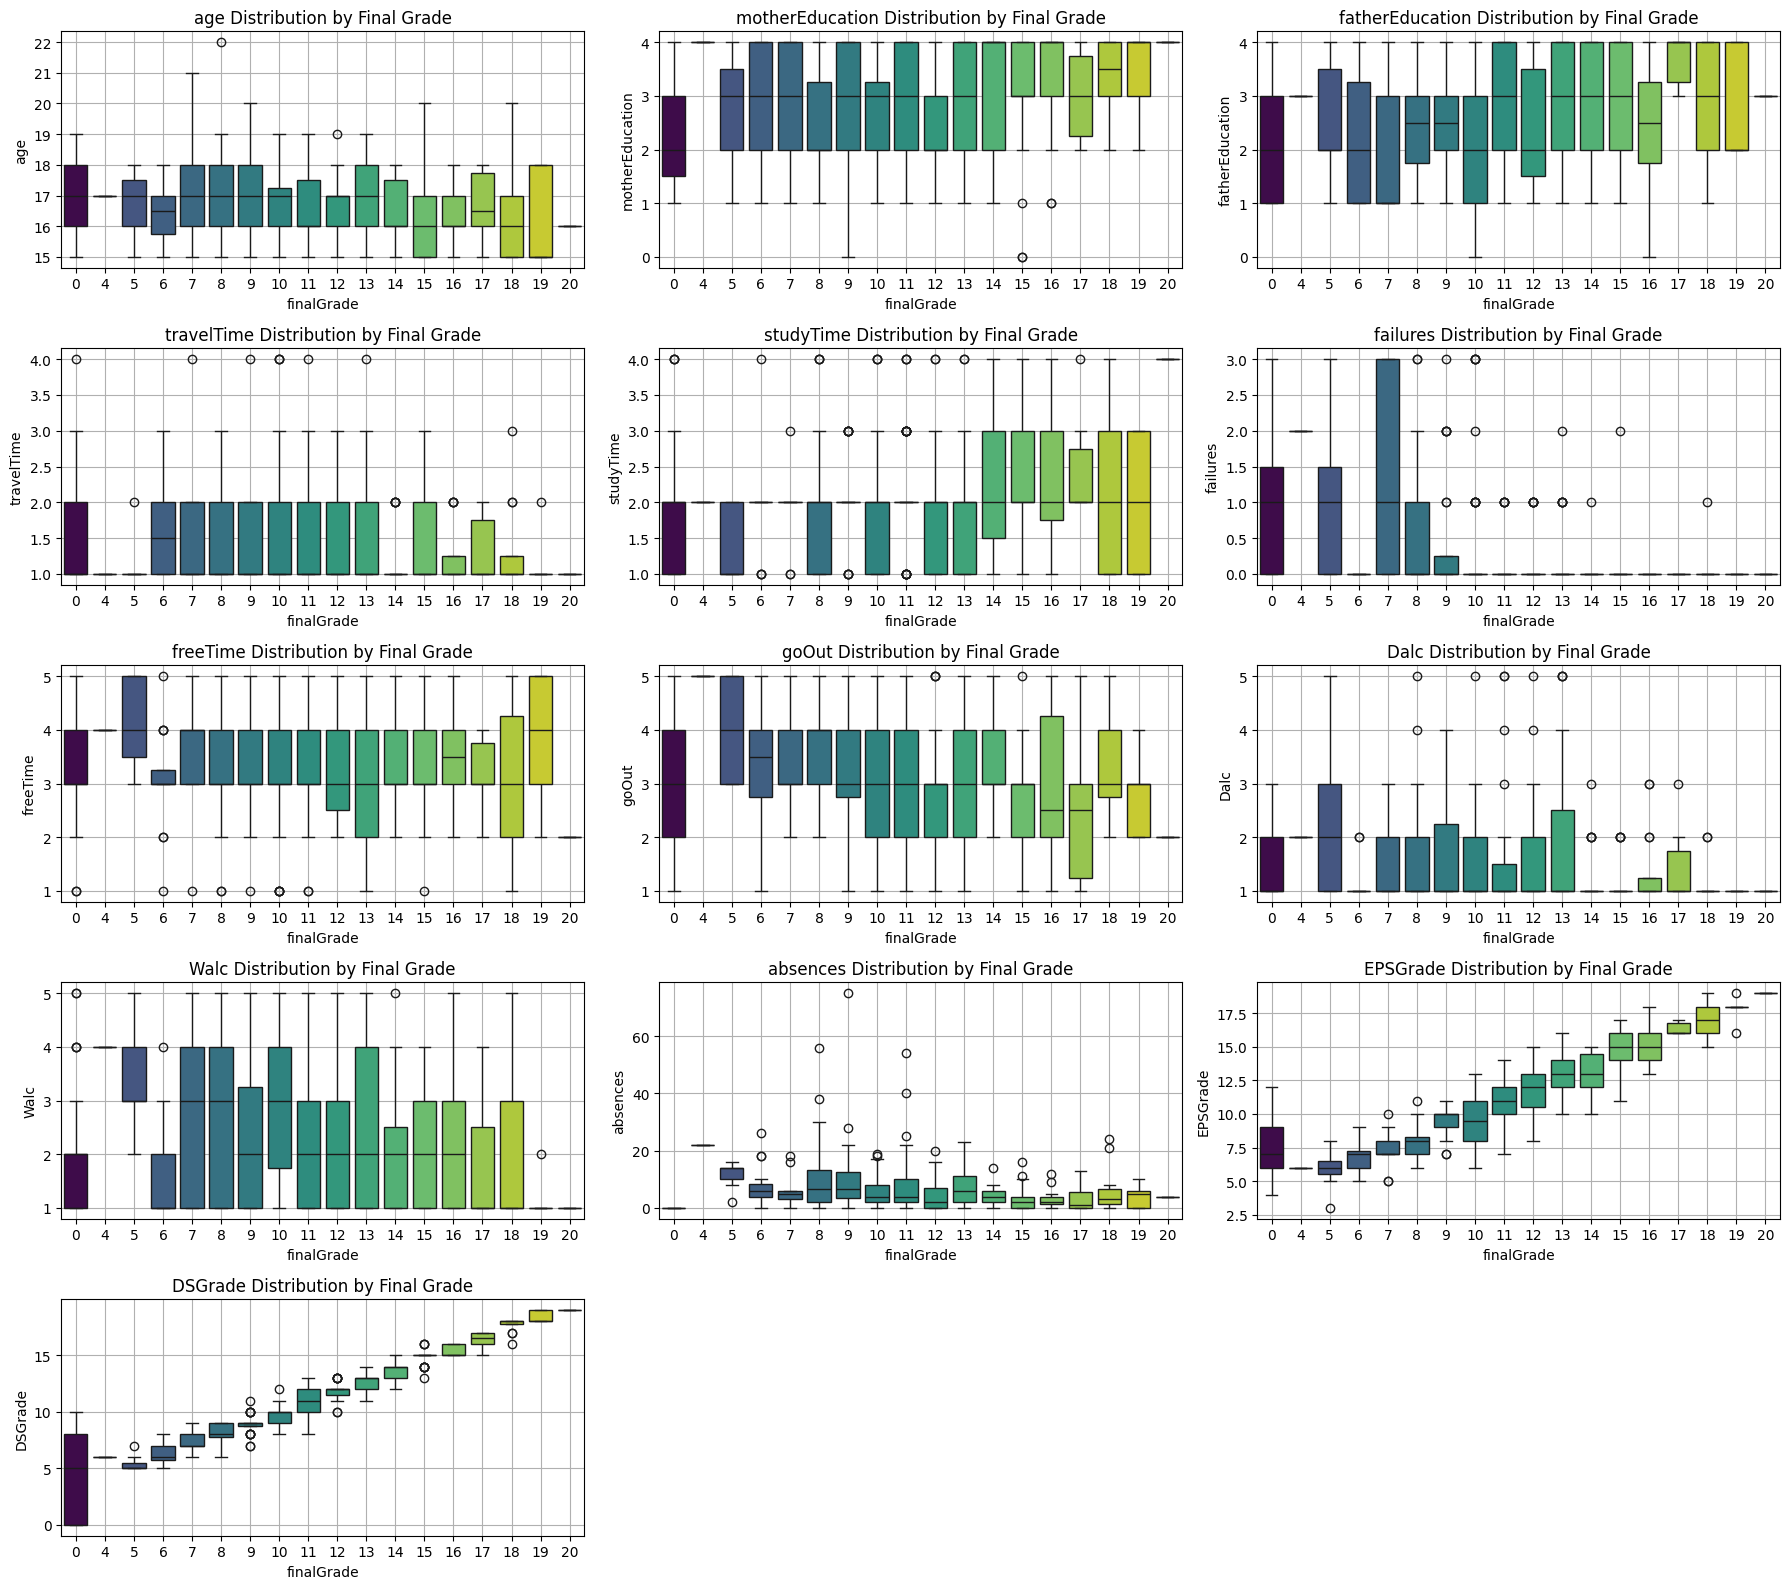

In [431]:
numerical_features = ['age', 'motherEducation', 'fatherEducation', 'travelTime', 'studyTime',
                      'failures', 'freeTime', 'goOut', 'Dalc', 'Walc', 'absences',
                      'EPSGrade', 'DSGrade']

plt.figure(figsize=(18, 16))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='finalGrade', y=col, data=students_data, hue='finalGrade', palette='viridis', legend=False)
    plt.title(f'{col} Distribution by Final Grade')
    plt.grid(True)
    plt.tight_layout()

plt.show()


### Correlation Heatmap

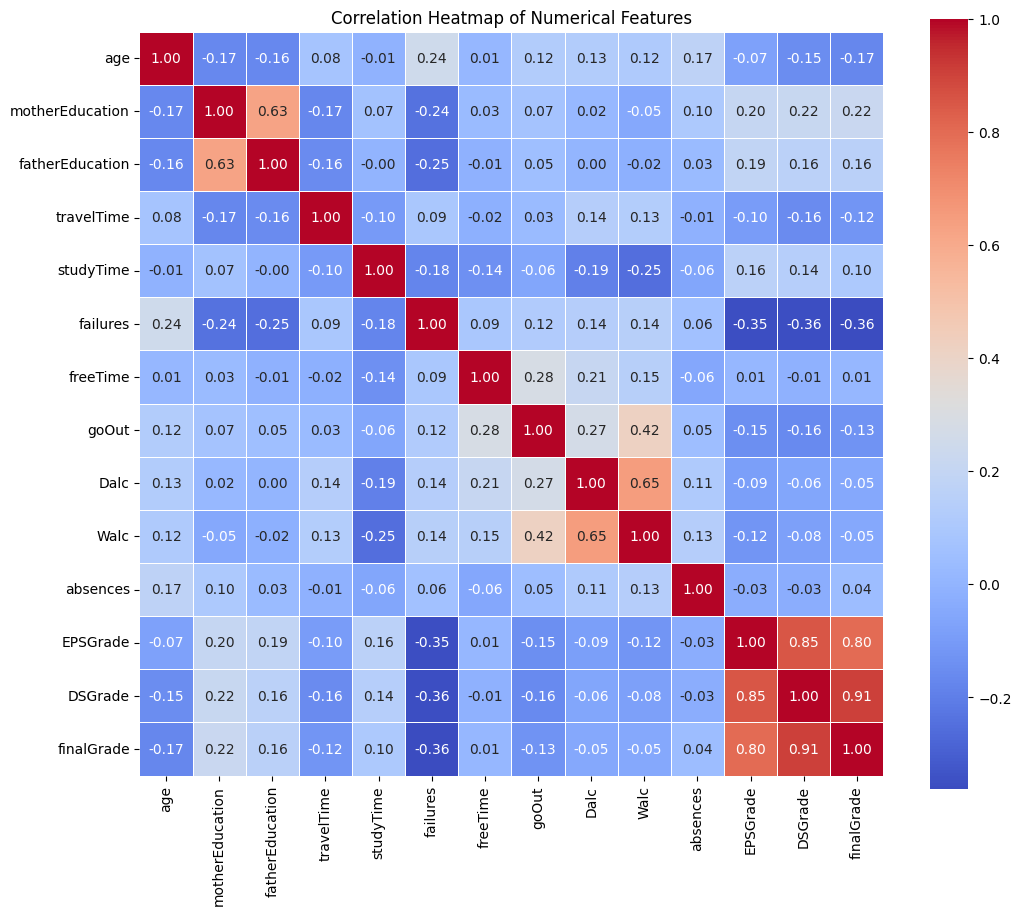

In [432]:
numerical_features = students_data.select_dtypes(include='number').columns.tolist()

corr_matrix = students_data[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Summary of Findings

* **EPSGrade and DSGrade are highly correlated with finalGrade**, indicating that past academic performance is a strong predictor of future success.
* **Study time has a moderate positive impact** on final grades — students who study more tend to perform better.
* **Failures show a negative correlation** with finalGrade — more past failures are associated with poorer performance.
* **Higher alcohol consumption (Dalc, Walc) is weakly negatively correlated** with academic success, suggesting lifestyle habits influence grades.
* **Free time shows a weak positive correlation**, possibly reflecting better time management or well-being.
* **Dalc and Walc are highly correlated**, meaning they may represent a single underlying behavior (alcohol consumption) and can be combined or regularized.

* **EPSGrade and DSGrade are strongly inter-correlated**, which may introduce **multicollinearity** — one could be dropped or carefully managed in certain models.

## **Data Preprocessing**

### Handling Missing Values

In [433]:
print(students_data.isnull().sum())

university           0
sex                  0
age                  0
address              0
motherEducation      0
fatherEducation      0
motherJob            0
fatherJob            0
reason               0
travelTime           0
studyTime            0
failures             0
universitySupport    0
paid                 0
higher               0
internet             0
romantic             0
freeTime             0
goOut                0
Dalc                 0
Walc                 0
absences             0
EPSGrade             0
DSGrade              0
finalGrade           0
dtype: int64


There is no missing value in the dataset.

### Handling Redundant and Ambiguous Categorical Features

All features in the dataset are **complete**. No imputation or removal of missing entries is necessary at this stage.

In this step, we addressed three categorical features with potentially ambiguous or sparse category values: **`motherJob`**, **`fatherJob`**, and **`reason`**.

* The features `motherJob` and `fatherJob` were removed from the dataset due to high cardinality and the presence of a vague `"other"` category, which lacked clear semantic meaning and could introduce noise in modeling.

* For the `reason` feature — which explains the student’s motivation for choosing a university — the `"other"` category was handled using domain-driven imputation:

  * If a student’s `travelTime` is **1** (indicating proximity to the university), `"other"` was logically replaced with **`"home"`**.
  * Otherwise, `"other"` was replaced with the **mode** (most frequent value) among the remaining meaningful categories: **`"reputation"`** and **`"course"`**. This helped align ambiguous entries with the most typical motivations observed in the data.

In [434]:
students_data.drop(columns=['motherJob', 'fatherJob'], inplace=True)

valid_reasons = students_data['reason'][students_data['reason'].isin(['reputation', 'course'])]
mode_reason = valid_reasons.mode()[0] if not valid_reasons.empty else 'reputation'

students_data['reason'] = students_data.apply(
    lambda row: 'home' if row['reason'] == 'other' and row['travelTime'] == 1
    else (mode_reason if row['reason'] == 'other' else row['reason']),
    axis=1
)

### Encoding Categorical Variables

To prepare the data for machine learning models, we converte categorical features into numerical values:
* **Label Encoding** was applied to binary columns:
  `sex`, `address`, `universitySupport`, `paid`, `higher`, `internet`, `romantic`
* **One-Hot Encoding** was used for multi-class columns:
  `university`, `motherJob`, `fatherJob`, `reason`
  
This ensures all features are numeric and suitable for model training.

In [435]:
categorical_features = [col for col in categorical_features if col in students_data.columns]

encoded_data = students_data.copy()

binary_cols = [col for col in categorical_features if students_data[col].nunique() == 2]

le = LabelEncoder()
for col in binary_cols:
    encoded_data[col] = le.fit_transform(encoded_data[col])

multi_class_cols = [col for col in categorical_features if students_data[col].nunique() > 2]
encoded_data = pd.get_dummies(encoded_data, columns=multi_class_cols, drop_first=True)

students_data = encoded_data

In [436]:
binary_features = ['sex', 'address', 'universitySupport', 'paid', 'higher', 'internet', 'romantic']
ordinal_features = ['motherEducation', 'fatherEducation']
nominal_features = ['university', 'reason']
numerical_features = [
    'age', 'travelTime', 'studyTime', 'failures', 'freeTime', 'goOut',
    'Dalc', 'Walc', 'absences', 'EPSGrade', 'DSGrade'
]

## **Feature Engineering**

### Creating New Features

In this step, we introduced three meaningful composite features to better capture students' behavioral patterns:

1. **`totalAlcohol`**:
   Combines weekday (`Dalc`) and weekend (`Walc`) alcohol consumption to provide an overall measure of alcohol use.

2. **`socialActivity`**:
   Summarizes the student’s available free time and social outings (`freeTime` + `goOut`) to reflect their overall social engagement.

3. **`studyCommitment`**:
   Estimates study dedication by weighting study time (`studyTime`) against available free time, assuming that more free time reduces effective study effort.


In [437]:
students_data['totalAlcohol'] = students_data['Dalc'] + students_data['Walc']

students_data['socialActivity'] = students_data['freeTime'] + students_data['goOut']

students_data['studyCommitment'] = students_data['studyTime'] * (5 - students_data['freeTime'])

### Transforming the Target Variable

We'll convert the `finalGrade` into 4 categories based on thresholds:

| Grade Range     | Category | Label |
| --------------- | -------- | ----- |
| ≥ 17            | A        | 3     |
| 14 ≤ grade < 17 | B        | 2     |
| 10 ≤ grade < 14 | C        | 1     |
| < 10            | F        | 0     |


In [438]:
def grade_to_category(grade):
    if grade >= 17:
        return 3  # A
    elif grade >= 14:
        return 2  # B
    elif grade >= 10:
        return 1  # C
    else:
        return 0  # F

students_data['finalGrade'] = students_data['finalGrade'].apply(grade_to_category)

## **Dataset Splitting**

In [439]:
X = students_data.drop(columns=['finalGrade'])
y = students_data['finalGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Normalization / Standardization**

Standardization and normalization are crucial for improving the performance and stability of many machine learning models. Features with different scales can negatively impact models like **K-Nearest Neighbors**, **SVM**, and **Gradient Descent–based algorithms**.

Comparison of Scaling Methods:

| Method              | Description                            | Notes                              |
| ------------------- | -------------------------------------- | ---------------------------------- |
| **Min-Max Scaling** | Scales features to \[0, 1]             | Sensitive to outliers              |
| **Standardization** | Centers data with mean 0 and std dev 1 | Works well with most ML algorithms |
| **Robust Scaler**   | Uses median and IQR                    | Handles outliers better            |


We used **StandardScaler** because:

* Most of our features are **numerical without extreme outliers**.
* It performs well across a wide range of models.
* It preserves the **distribution shape** while standardizing the scale.

In [440]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Model Development and Evaluation**

### Naive Bayes

For this model, the datasets are not scaled.

In [441]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nb)
print(f"\nAccuracy: {accuracy:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

precision_macro = precision_score(y_test, y_pred_nb, average='macro')
recall_macro = recall_score(y_test, y_pred_nb, average='macro')
f1_macro = f1_score(y_test, y_pred_nb, average='macro')

precision_micro = precision_score(y_test, y_pred_nb, average='micro')
recall_micro = recall_score(y_test, y_pred_nb, average='micro')
f1_micro = f1_score(y_test, y_pred_nb, average='micro')

precision_weighted = precision_score(y_test, y_pred_nb, average='weighted')
recall_weighted = recall_score(y_test, y_pred_nb, average='weighted')
f1_weighted = f1_score(y_test, y_pred_nb, average='weighted')

print(f"\nMacro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

print(f"\nMicro Precision: {precision_micro:.4f}")
print(f"Micro Recall: {recall_micro:.4f}")
print(f"Micro F1 Score: {f1_micro:.4f}")

print(f"\nWeighted Precision: {precision_weighted:.4f}")
print(f"Weighted Recall: {recall_weighted:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")


Accuracy: 0.7750
Confusion Matrix:
 [[22  5  0  0]
 [ 7 21  5  0]
 [ 0  0 14  1]
 [ 0  0  0  5]]

Macro Precision: 0.7841
Macro Recall: 0.8461
Macro F1 Score: 0.8075

Micro Precision: 0.7750
Micro Recall: 0.7750
Micro F1 Score: 0.7750

Weighted Precision: 0.7794
Weighted Recall: 0.7750
Weighted F1 Score: 0.7701


### Decision Tree

#### Hyperparameter tuning with GridSearch

In [442]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

best_dt = grid_search.best_estimator_
print("Best Parameters Found:", grid_search.best_params_)

Best Parameters Found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


#### Evaluation on test set

In [443]:
y_pred_dt = best_dt.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

print(f"\nMacro Precision: {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Macro F1 Score: {f1_score(y_test, y_pred_dt, average='macro'):.4f}")

print(f"\nMicro Precision: {precision_score(y_test, y_pred_dt, average='micro'):.4f}")
print(f"Micro Recall: {recall_score(y_test, y_pred_dt, average='micro'):.4f}")
print(f"Micro F1 Score: {f1_score(y_test, y_pred_dt, average='micro'):.4f}")

print(f"\nWeighted Precision: {precision_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")


Accuracy: 0.8875

Confusion Matrix:
 [[23  4  0  0]
 [ 4 29  0  0]
 [ 0  1 14  0]
 [ 0  0  0  5]]

Macro Precision: 0.9262
Macro Recall: 0.9160
Macro F1 Score: 0.9208

Micro Precision: 0.8875
Micro Recall: 0.8875
Micro F1 Score: 0.8875

Weighted Precision: 0.8893
Weighted Recall: 0.8875
Weighted F1 Score: 0.8881


#### Decision Tree Visualization

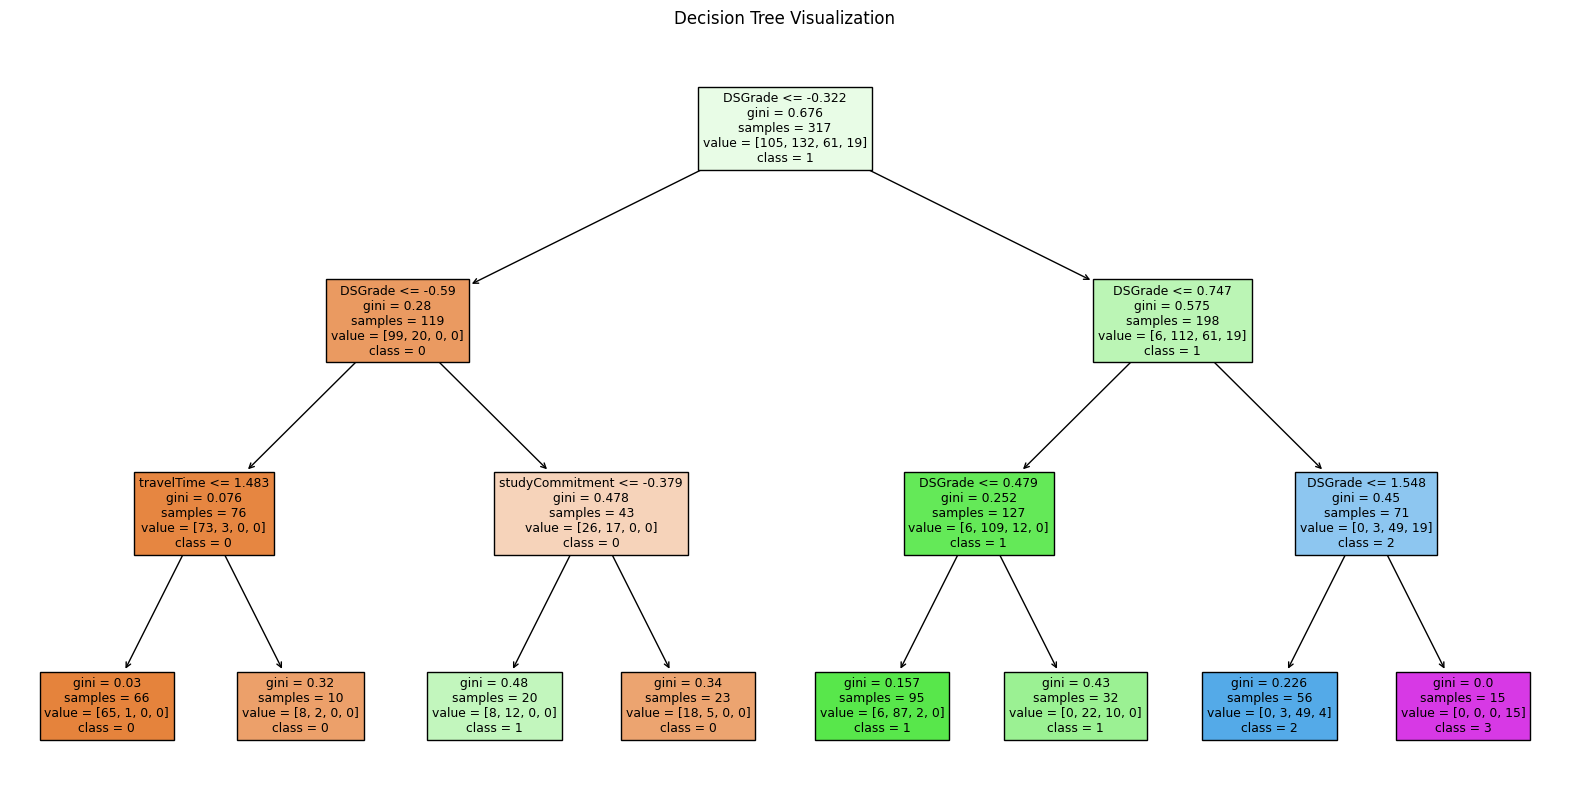

In [444]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X_train.columns, class_names=best_dt.classes_.astype(str))
plt.title("Decision Tree Visualization")
plt.show()

#### Feature Importance Analysis

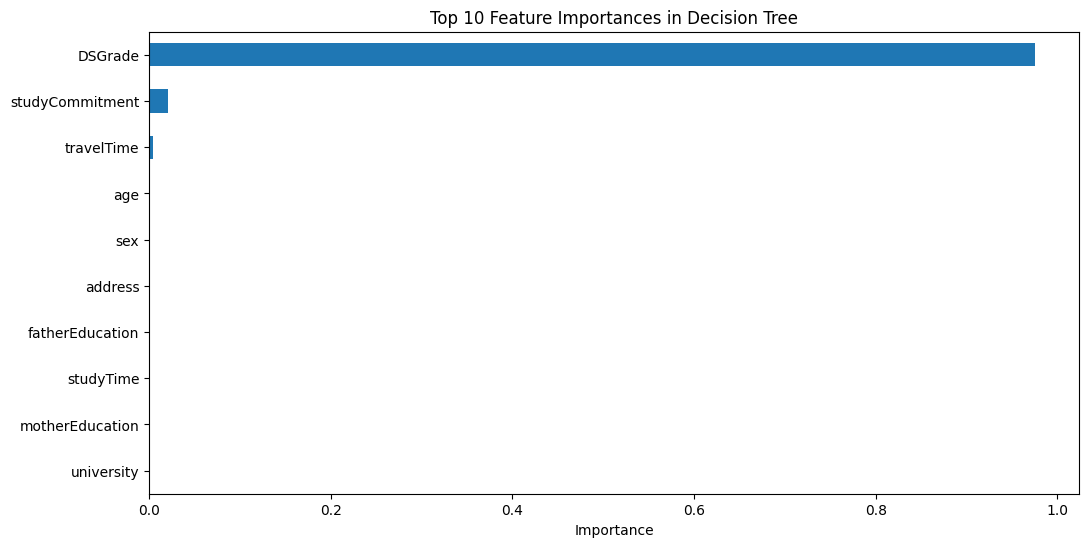

In [445]:
feature_importances = pd.Series(best_dt.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sorted_importances.head(10).plot(kind='barh')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances in Decision Tree')
plt.gca().invert_yaxis()
plt.show()


### Random Forest

#### Hyperparameter Tuning with RandomizedSearchCV

In [446]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

best_rf = random_search.best_estimator_
print("Best Parameters Found:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters Found: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}


#### Evaluation on test set

In [447]:
y_pred_rf = best_rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print(f"\nMacro Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Macro F1 Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

print(f"\nMicro Precision: {precision_score(y_test, y_pred_rf, average='micro'):.4f}")
print(f"Micro Recall: {recall_score(y_test, y_pred_rf, average='micro'):.4f}")
print(f"Micro F1 Score: {f1_score(y_test, y_pred_rf, average='micro'):.4f}")

print(f"\nWeighted Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")


Accuracy: 0.8875

Confusion Matrix:
 [[25  2  0  0]
 [ 4 27  2  0]
 [ 0  1 14  0]
 [ 0  0  0  5]]

Macro Precision: 0.9093
Macro Recall: 0.9194
Macro F1 Score: 0.9133

Micro Precision: 0.8875
Micro Recall: 0.8875
Micro F1 Score: 0.8875

Weighted Precision: 0.8888
Weighted Recall: 0.8875
Weighted F1 Score: 0.8868


#### Feature Importance Analysis

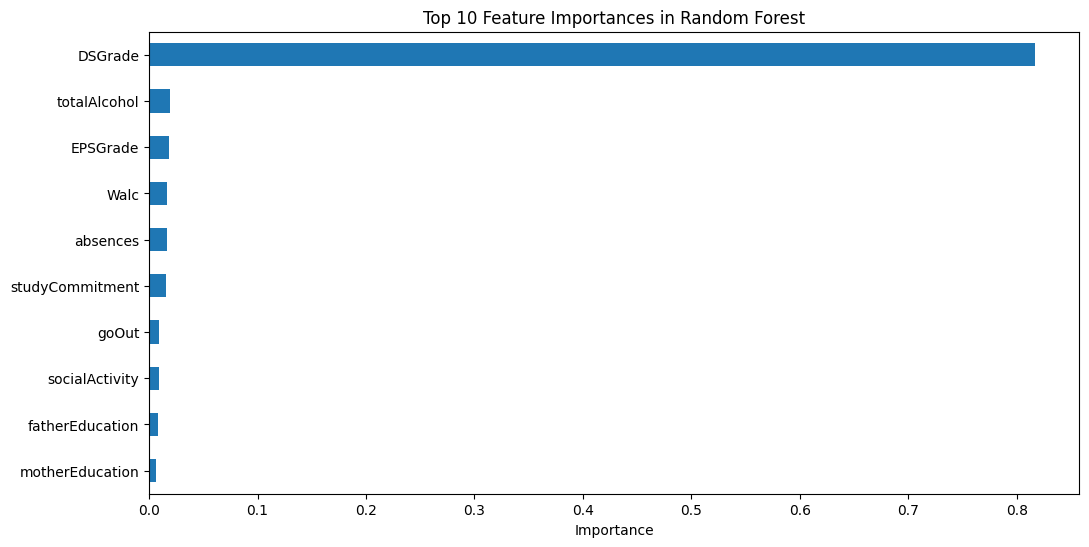

In [448]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sorted_importances.head(10).plot(kind='barh')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.show()

### XGBoost

#### Training the XGBoost model

In [449]:
param_grid = {
    'learning_rate': [0.05, 0.1],             
    'n_estimators': [100, 200],               
    'min_child_weight': [1, 5],           
    'max_depth': [4, 6],                      
    'colsample_bytree': [0.8, 1.0],          
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)

best_xgb = grid_search.best_estimator_

print("Best Parameters Found:", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters Found: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100}


C:\Users\parsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:57:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### Evaluation on test set

In [450]:
y_pred_xgb = best_xgb.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"\nAccuracy: {accuracy:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

precision_macro = precision_score(y_test, y_pred_xgb, average='macro')
recall_macro = recall_score(y_test, y_pred_xgb, average='macro')
f1_macro = f1_score(y_test, y_pred_xgb, average='macro')

precision_micro = precision_score(y_test, y_pred_xgb, average='micro')
recall_micro = recall_score(y_test, y_pred_xgb, average='micro')
f1_micro = f1_score(y_test, y_pred_xgb, average='micro')

precision_weighted = precision_score(y_test, y_pred_xgb, average='weighted')
recall_weighted = recall_score(y_test, y_pred_xgb, average='weighted')
f1_weighted = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"\nMacro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

print(f"\nMicro Precision: {precision_micro:.4f}")
print(f"Micro Recall: {recall_micro:.4f}")
print(f"Micro F1 Score: {f1_micro:.4f}")

print(f"\nWeighted Precision: {precision_weighted:.4f}")
print(f"Weighted Recall: {recall_weighted:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")


Accuracy: 0.9125
Confusion Matrix:
 [[24  3  0  0]
 [ 3 30  0  0]
 [ 0  1 14  0]
 [ 0  0  0  5]]

Macro Precision: 0.9428
Macro Recall: 0.9328
Macro F1 Score: 0.9375

Micro Precision: 0.9125
Micro Recall: 0.9125
Micro F1 Score: 0.9125

Weighted Precision: 0.9140
Weighted Recall: 0.9125
Weighted F1 Score: 0.9129


#### Feature Importance Analysis

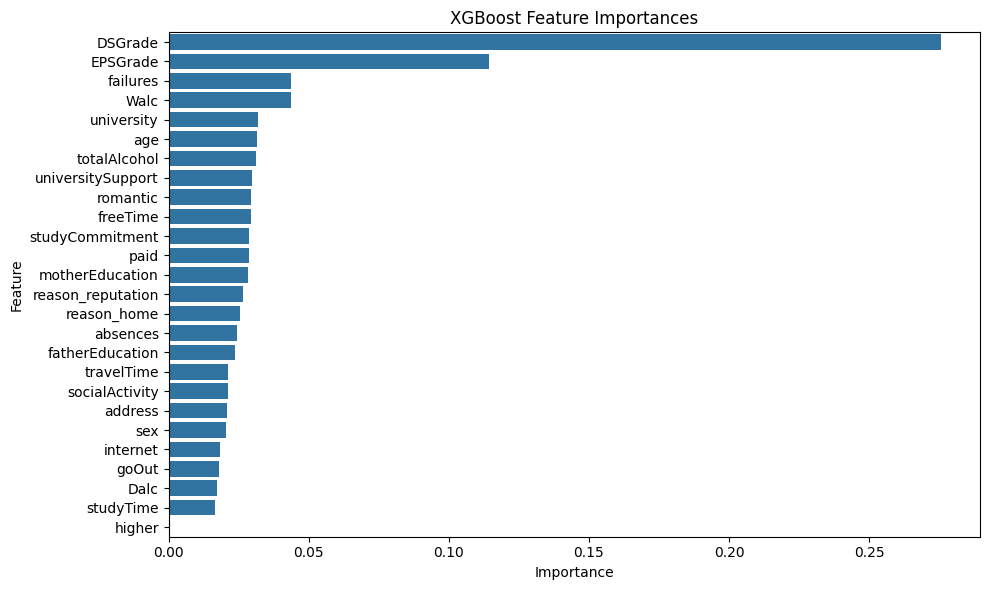

In [451]:
importances = best_xgb.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()

## **Custom Decision Tree Implementation**

### Building from Scratch

In [452]:
class CustomDecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        """
        Parameters:
        - max_depth (int, optional): Maximum depth of the tree.
        - min_samples_split (int): Minimum number of samples required to split a node.
        - min_samples_leaf (int): Minimum number of samples required at a leaf node.
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def _entropy(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
        return entropy

    def _majority_class(self, y):
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]

    def _information_gain(self, X, y, feature_idx, threshold):
        """
        Parameters:
        - X: Feature matrix.
        - y: Labels.
        - feature_idx: Index of the feature to split on.
        - threshold: Threshold for numerical features.
        Returns:
        - Information gain.
        """
        parent_entropy = self._entropy(y)
        n = len(y)

        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask

        left_y, right_y = y[left_mask], y[right_mask]
        if len(left_y) < self.min_samples_leaf or len(right_y) < self.min_samples_leaf:
            return 0

        weighted_entropy = (len(left_y) / n) * self._entropy(left_y) + \
                           (len(right_y) / n) * self._entropy(right_y)

        return parent_entropy - weighted_entropy

    def _best_split(self, X, y):
        """
        Find the best feature and threshold to split on.

        Parameters:
        - X: Feature matrix.
        - y: Labels.
        Returns:
        - Tuple (best_feature, best_threshold, best_gain).
        """
        best_feature, best_threshold, best_gain = None, None, -1
        n_features = X.shape[1]

        for feature_idx in range(n_features):
            if not np.issubdtype(X[:, feature_idx].dtype, np.number):
                continue

            unique_values = np.unique(X[:, feature_idx])
            if len(unique_values) == 1:
                continue

            thresholds = np.percentile(unique_values, np.linspace(10, 90, 10))

            for threshold in thresholds:
                gain = self._information_gain(X, y, feature_idx, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def _build_tree(self, X, y, depth=0):
        n_samples, _ = X.shape
        n_classes = len(np.unique(y))

        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split or \
           n_classes == 1:
            return {'leaf': True, 'class': self._majority_class(y)}

        feature_idx, threshold, gain = self._best_split(X, y)
        if feature_idx is None or gain == 0:
            return {'leaf': True, 'class': self._majority_class(y)}

        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask
        left_X, left_y = X[left_mask], y[left_mask]
        right_X, right_y = X[right_mask], y[right_mask]

        if len(left_y) < self.min_samples_leaf or len(right_y) < self.min_samples_leaf:
            return {'leaf': True, 'class': self._majority_class(y)}

        return {
            'leaf': False,
            'feature_idx': feature_idx,
            'threshold': threshold,
            'left': self._build_tree(left_X, left_y, depth + 1),
            'right': self._build_tree(right_X, right_y, depth + 1)
        }

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _predict_one_sample(self, x, node):
        if node['leaf']:
            return node['class']

        feature_idx = node['feature_idx']
        threshold = node['threshold']

        if x[feature_idx] <= threshold:
            return self._predict_one_sample(x, node['left'])
        else:
            return self._predict_one_sample(x, node['right'])

    def predict(self, X):
        return np.array([self._predict_one_sample(x, self.tree) for x in X])


### Comparison with Scikit-learn

In [453]:
my_tree = CustomDecisionTree(max_depth=5, min_samples_split=10, min_samples_leaf=5)
my_tree.fit(X_train_scaled, y_train)
y_pred_custom = my_tree.predict(X_test_scaled)

print("Custom Decision Tree Implementation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_custom):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print(f"Macro Precision: {precision_score(y_test, y_pred_custom, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_pred_custom, average='macro'):.4f}")
print(f"Macro F1 Score: {f1_score(y_test, y_pred_custom, average='macro'):.4f}")
print(f"Micro Precision: {precision_score(y_test, y_pred_custom, average='micro'):.4f}")
print(f"Micro Recall: {recall_score(y_test, y_pred_custom, average='micro'):.4f}")
print(f"Micro F1 Score: {f1_score(y_test, y_pred_custom, average='micro'):.4f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred_custom, average='weighted'):.4f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred_custom, average='weighted'):.4f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_custom, average='weighted'):.4f}")

y_pred_sklearn = best_dt.predict(X_test_scaled)
print("\nScikit-learn Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sklearn):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sklearn))
print(f"Macro Precision: {precision_score(y_test, y_pred_sklearn, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_pred_sklearn, average='macro'):.4f}")
print(f"Macro F1 Score: {f1_score(y_test, y_pred_sklearn, average='macro'):.4f}")
print(f"Micro Precision: {precision_score(y_test, y_pred_sklearn, average='micro'):.4f}")
print(f"Micro Recall: {recall_score(y_test, y_pred_sklearn, average='micro'):.4f}")
print(f"Micro F1 Score: {f1_score(y_test, y_pred_sklearn, average='micro'):.4f}")
print(f"Weighted Precision: {precision_score(y_test, y_pred_sklearn, average='weighted'):.4f}")
print(f"Weighted Recall: {recall_score(y_test, y_pred_sklearn, average='weighted'):.4f}")
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_sklearn, average='weighted'):.4f}")


Custom Decision Tree Implementation:
Accuracy: 0.8750
Confusion Matrix:
 [[24  3  0  0]
 [ 4 27  2  0]
 [ 0  1 14  0]
 [ 0  0  0  5]]
Macro Precision: 0.9008
Macro Recall: 0.9101
Macro F1 Score: 0.9049
Micro Precision: 0.8750
Micro Recall: 0.8750
Micro F1 Score: 0.8750
Weighted Precision: 0.8751
Weighted Recall: 0.8750
Weighted F1 Score: 0.8744

Scikit-learn Decision Tree Classifier:
Accuracy: 0.8875
Confusion Matrix:
 [[23  4  0  0]
 [ 4 29  0  0]
 [ 0  1 14  0]
 [ 0  0  0  5]]
Macro Precision: 0.9262
Macro Recall: 0.9160
Macro F1 Score: 0.9208
Micro Precision: 0.8875
Micro Recall: 0.8875
Micro F1 Score: 0.8875
Weighted Precision: 0.8893
Weighted Recall: 0.8875
Weighted F1 Score: 0.8881


## **Predict Your AI Grade**

Fill in your information in the ``new_student_data`` map:

In [454]:
new_student_data = {
    'university': 'PR',
    'sex': 'M',
    'age': 20,
    'address': 'U',
    'motherEducation': 0,
    'fatherEducation': 0,
    'motherJob': 'at_home',
    'fatherJob': 'other',
    'reason': 'reputation',
    'travelTime': 2,
    'studyTime': 4,
    'failures': 0,
    'universitySupport': 1,  # yes → 1
    'paid': 0,               # no → 0
    'higher': 0,             # no → 0
    'internet': 1,           # yes → 1
    'romantic': 0,           # no → 0
    'freeTime': 1,
    'goOut': 2,
    'Dalc': 1,
    'Walc': 1,
    'absences': 6,
    'EPSGrade': 20,
    'DSGrade': 20
}

Data Preprocessing & Feature Engineering:

In [455]:
student_df = pd.DataFrame([new_student_data])

student_df.drop(columns=['motherJob', 'fatherJob'], inplace=True)

categorical_cols = ['university', 'sex', 'address', 'reason']
student_df = pd.get_dummies(student_df, columns=categorical_cols, drop_first=True)

student_df = student_df.reindex(columns=X_train.columns, fill_value=0)

Predicting the final grade with XGBoost model:

In [456]:
prediction = best_xgb.predict(student_df)[0]

grade_map = {0: 'F (Fail)', 1: 'C (Pass)', 2: 'B (Good)', 3: 'A (Excellent)'}
predicted_grade = grade_map[prediction]

print(f"Predicted Final Grade: {predicted_grade}")

Predicted Final Grade: A (Excellent)
